# Assignment 4
## Due May 21 at 14:00

Please do not chance any provided variable name. Read carefully the instructions in the exercise PDF and in this notebook. Add your solutions at `YOUR CODE HERE` and remove the corresponding `raise NotImplementedError()`.
Before submitting: Please make sure, that your notebook can be executed from top to bottom without an error (Menu -> Kernel -> Restart & Run all). 

This is just because some defaults of sklearn will change in the next version and because the linear SVN does not converge in time. Without them one gets a lot of warnings.

In [1]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=ConvergenceWarning)

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

np.random.seed(42)

## Exercise 1

### a)

In [3]:
# create the variables names, xs, ys
candies = pd.read_csv("candy-data.csv")
name = candies["competitorname"]
ys   = candies["chocolate"]
xs   = candies[['fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent', 'pricepercent', 'winpercent']]

In [4]:
# split (xs, ys) into (xs_train, ys_train) and (xs_test, ys_test)

xs_train = xs.iloc[:56]
y_train  = ys.iloc[:56]
xs_test  = xs.iloc[56:]
ys_test  = ys.iloc[56:]

### b)

In [5]:
lr = LogisticRegression(C=1.0).fit(xs_train, y_train)
y_predict = lr.predict(xs_test)

def test_accuracy(y_predict_, ys_test_):
    acc = 0.0
    for idx, elem in enumerate(ys_test_):
        if(elem == y_predict_[idx]):
            acc += 1    
    acc /= len(y_predict_)
    return acc

acc = test_accuracy(y_predict, ys_test)
print(acc)

0.8275862068965517


### c)

In [6]:
Cs =  [0.001, 0.01, 0.1, 1, 10, 100, 1000]

Until the next version of sklearn (0.22) we need to set iid to false otherwise it does not work like the CV presented in the slides.
More here https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

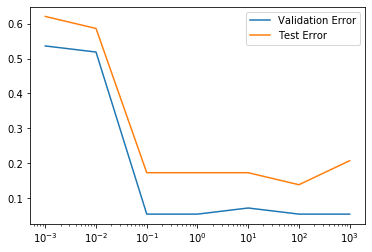

Test error of cross validation:  0.1724137931034483
Best possible test error given Cs:  0.13793103448275867


In [7]:
# Run cross validation using GridSearchCV
parameters = {'C': Cs}
logR = LogisticRegression()
gridSearch = GridSearchCV(logR, parameters, iid=False)

# Compute cross validation error
gridSearch.fit(xs_train, y_train)
y_predict0 = gridSearch.predict(xs_test)
cv_accuracy = test_accuracy(y_predict0, ys_test)
# Compute test error
accs = []
for c in Cs:
    lr2 = LogisticRegression(C=c).fit(xs_train, y_train)
    y_predict2 = lr2.predict(xs_test)
    accs.append(1.0 - test_accuracy(y_predict2, ys_test))

# Plot results in new figure
fig, axis = plt.subplots(1)
legend = ["Validation Error", "Test Error"]
plt.plot(Cs,1.0 - gridSearch.cv_results_["mean_test_score"])
plt.plot(Cs, accs)
plt.legend(legend)
plt.xscale("log")
plt.show()


print("Test error of cross validation: ", 1.0 - cv_accuracy)
print("Best possible test error given Cs: ", min(accs))

### d) Comment. Does CV choose the best C? How do different values of C compare with respect to over/underfitting? Does the optimal C change if you run the code again? 

No CV does not choose the best C. (Because multiple C have the same Validation Error but 1 of them has lower test error.)
The best C does not change when I rerun the cell.
Very small values of C underfit as can be seen by the high validation error.
On very large C some overfitting seems to accur as the test error rises again.